# Seaborn
Seaborn은 그래프를 그려주는 패키지입니다  
matplotlib보다 더 다양한 기능을 제공하고 있어 알아두면 좋은 패키지입니다

In [1]:
# 먼저 seaborn을 설치 후 불러옵니다
!pip install seaborn
import seaborn as sns #관례적으로 sns라고 사용합니다

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 문자 깨지는 것 대처
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False
# 그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 

# 1) 1차원 분포 플롯
1차원 데이터는 실수 값이면 히스토그램과 같은 "실수 분포 플롯"으로 나타내고  
카테고리값이면 "카운트 플롯"으로 나타냅니다

In [3]:
# 샘플 데이터 로드
iris=sns.load_dataset('iris') 
titanic=sns.load_dataset('titanic')
tips=sns.load_dataset('tips')
flights=sns.load_dataset('flights')

## 1차원 실수 분포 플롯
실수 분포 플롯은 자료의 분포를 묘사하기 위한 것으로 matplotlib의 단순한 히스토그램과 달리   
커널 밀도(kernel density) 및 러그(rug) 표시 기능 및 다차원 복학 분포 기능 등을 제공합니다  
1차원 실수 분포 플롯에는 `rugplot`,`kdeplot`,`distplot`등이 있습니다

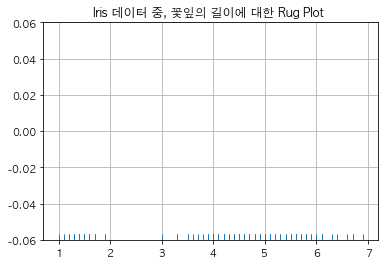

In [4]:
# rugplot: 러그(rug) 플롯은 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여줍니다.
x=iris.petal_length.values

sns.rugplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot ")
plt.grid()
plt.show()

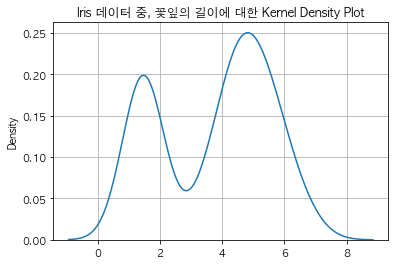

In [5]:
# kdeplot: 커널 밀도(kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법입니다

sns.kdeplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")
plt.grid()
plt.show()

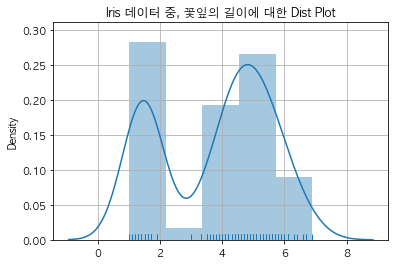

In [6]:
# distplot: 히스토그램, rug, kde 모두 포함하고 있습니다
sns.distplot(x, hist=True, kde=True, rug=True)
plt.grid()
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()

## 카운트 플롯
`countplot` 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있습니다.

`countplot(x="column_name", data=dataframe)`  
data 인수에는 대상이 되는 데이터프레임을, x 인수에는 데이터프레임의 열 이름 문자열을 넣습니다

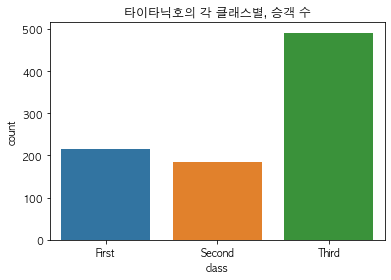

In [7]:
sns.countplot(x='class', data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

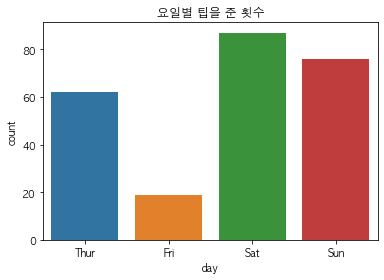

In [8]:
sns.countplot(x="day", data=tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

# 2) 다차원 데이터
데이터 변수가 여러개인 다차원 데이터는 데이터의 종류에 따라 다음과 같은 경우에 따라 나눕니다

<li>분석하고자 하는 데이터가 모두 실수 값인 경우</li>

<li>분석하고자 하는 데이터가 모두 카테고리 값인 경우</li>

<li>분석하고자 하는 데이터가 모두 실수 값과 카테고리 값이 섞여 있는 경우</li>   


## 2차원 실수형 데이터
만약 데이터가 2차원이고 모두 연속적인 실수값이라면 "스캐터 플롯"을 사용합니다
`jointplot(x="x_name", y="y_name", data=dataframe, kind='scatter')`  

data 인수에는 대상이 되는 데이터프레임을,    
x 인수에는 x 변수가 될 데이터프레임의 열 이름   
y 인수에는 y 변수가 될 데이터프레임의 열 이름    
kind는 차트의 종류를 지정합니다. (kind='scatter'이면 스캐터 플롯)  

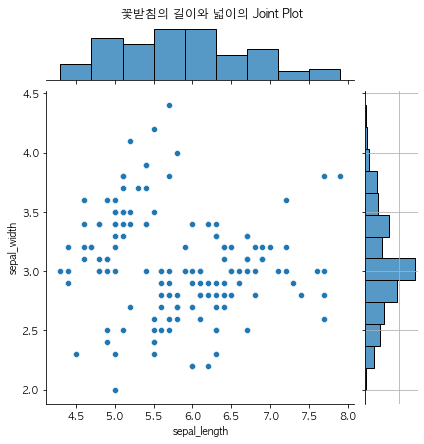

In [9]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind='scatter')
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.grid()
plt.show()

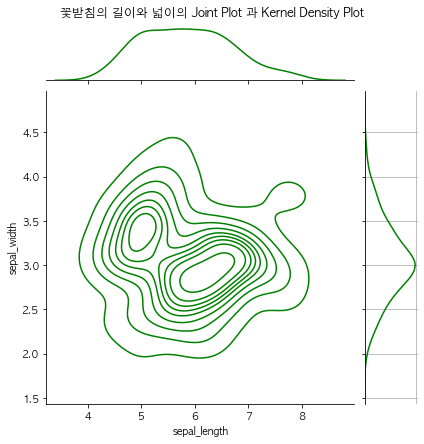

In [10]:
# kind='kde'이면 커널 밀도 히스토그램을 그린다.
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde" ,color='g')
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot", y=1.02)
plt.grid()
plt.show()

## 다차원 실수형 그래프
만약 3차원 이상의 데이터라면 "pairplot" 사용합니다.   
pairplot은 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그립니다.   
같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그립니다.  
`pairplot(data)`

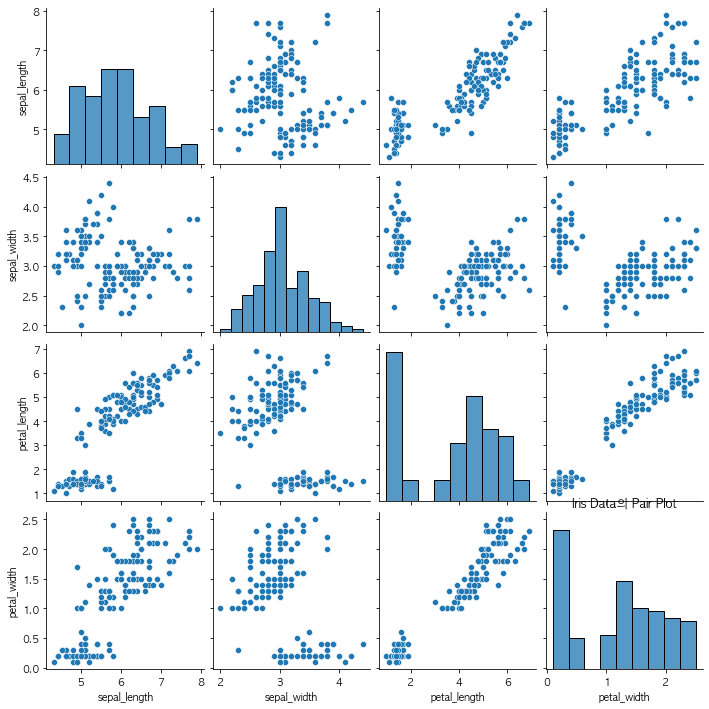

In [11]:
sns.pairplot(iris)
plt.title("Iris Data의 Pair Plot")
plt.grid()
plt.show()

만약 카테고리형 데이터가 섞여 있는 경우에는 hue 인수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게 할 수 있습니다.

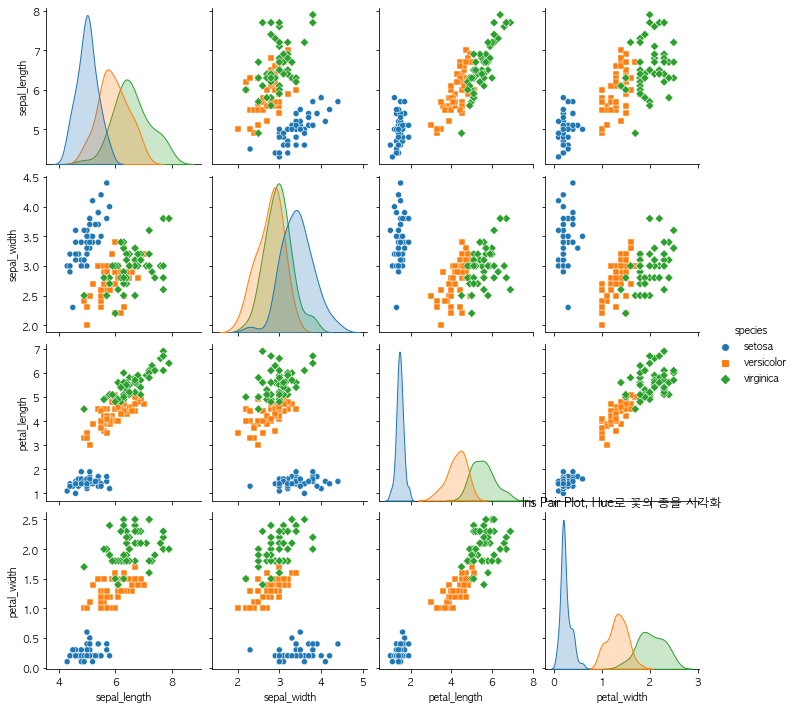

In [12]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.title("Iris Pair Plot, Hue로 꽃의 종을 시각화")
plt.show()

## 2차원 복합 데이터
만약 데이터가 2차원이고 실수 값과 카테고리 값이 섞여 있다면 다음고 같은 다양한 플롯들을 그릴 수 있습니다

<li>barplot</li>

<li>boxplot</li>

<li>violinplot</li>

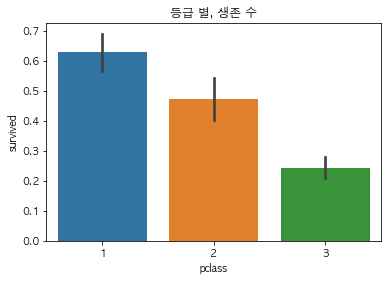

In [13]:
# barplot: 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트를 생성합니다. (평균은 막대의 높이로, 편차는 검은색 에러바로 표시)
sns.barplot(x="pclass", y="survived", data=titanic)
plt.title("등급 별, 생존 수")
plt.show()

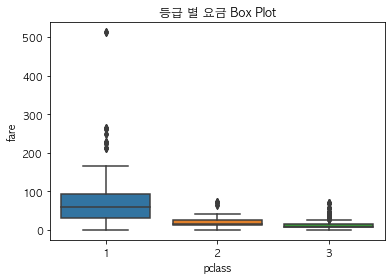

In [14]:
# boxplot: 박스 플롯 차트를 그려줍니다. 
sns.boxplot(x="pclass", y="fare", data=titanic)
plt.title("등급 별 요금 Box Plot")
plt.show()

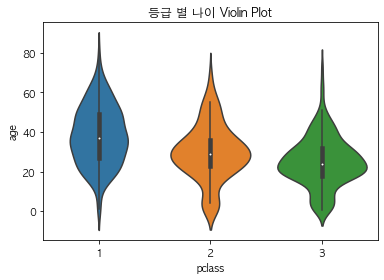

In [15]:
# violinplot: 세로 방향으로 커널 밀도 히스토그램을 그려줍니다 왼쪽과 오른쪽이 대칭이 되도록 하여 바이올린처럼 보이는 특징이 있습니다
sns.violinplot(x="pclass", y="age", data=titanic)
plt.title("등급 별 나이 Violin Plot")
plt.show()


## 다차원 복합 데이터
hue 인수에 카테고리 값을 가지는 변수의 이름을 지정하면 카테고리 값에 따라 다르게 시각화됩니다

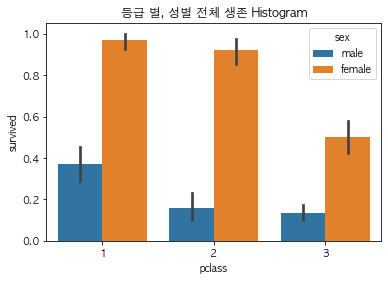

In [16]:
sns.barplot(x="pclass", y="survived", hue="sex", data=titanic)
plt.title("등급 별, 성별 전체 생존 Histogram")
plt.show()

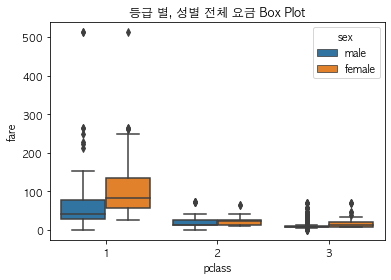

In [17]:
sns.boxplot(x="pclass", y="fare",hue="sex",  data=titanic)
plt.title("등급 별, 성별 전체 요금 Box Plot")
plt.show()

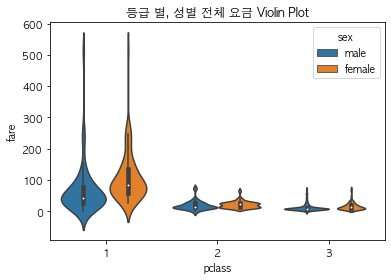

In [18]:
sns.violinplot(x="pclass", y="fare",hue="sex",  data=titanic)
plt.title("등급 별, 성별 전체 요금 Violin Plot")
plt.show()

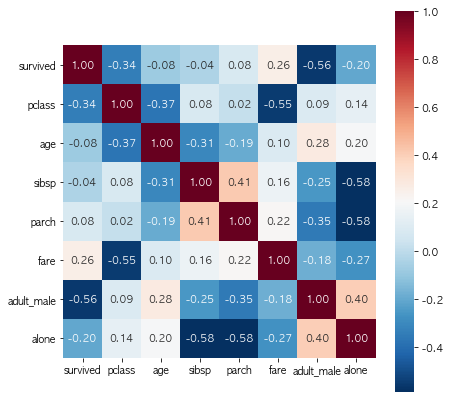

In [19]:
# heatmap: 두 피쳐의 상관관계를 나타냅니다
plt.figure(figsize=(7,7))
sns.heatmap(titanic.corr(), cmap='RdBu_r', square=True, cbar=True, annot=True, fmt=".2f")
plt.show()

# 3) 스타일
Seaborn을 임포트하면 색상 등을 Matplotlib에서 제공하는 기본 스타일이 아닌 Seaborn에서 지정한 기본 스타일로 바꿉니다.  
따라서 동일한 Matplotlib 명령을 수행해도 Seaborn을 임포트 한 것과 하지 않은 플롯은 모양이 다릅니다

In [20]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

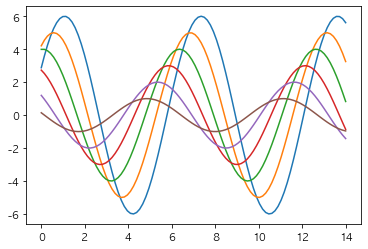

In [21]:
# 적용 전
sinplot()

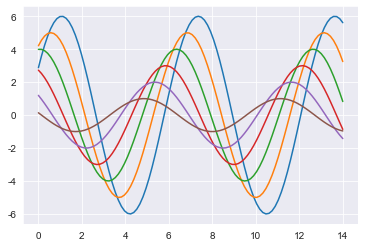

In [22]:
sns.set_style("darkgrid")
sinplot()

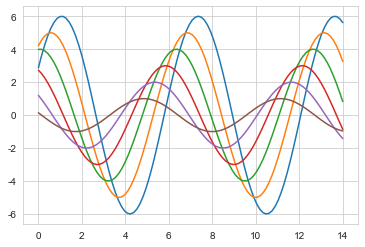

In [23]:
sns.set_style("whitegrid")
sinplot()